 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [128]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [53]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE

# Read in and create dataframe
whale_returns_df = pd.read_csv(whale_returns_csv, index_col ="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index 
whale_returns_df.sort_index(ascending= False, inplace=True)

# Display some statistics
whale_returns_df.head()
whale_returns_df.shape
whale_returns_df.describe()
whale_returns_df.count()
whale_returns_df.duplicated()
whale_returns_df.dtypes

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [54]:
# Count nulls
# YOUR CODE HERE

# Checking for null
whale_returns_df.isnull()

# Determining percentage of nulls
whale_returns_df.isnull().mean() * 100

# Determining number of nulls
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [55]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)

# Check if nulls are gone
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [56]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [57]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE

# Read in and create dataframe
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index
algo_returns_df.sort_index(ascending=False, inplace=True)

# Display some statistics
algo_returns_df.head()
algo_returns_df.shape
algo_returns_df.describe()
algo_returns_df.count()
algo_returns_df.duplicated()

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [58]:
# Count nulls
# YOUR CODE HERE

# Checking for null
algo_returns_df.isnull()

# Determining percentage of nulls
algo_returns_df.isnull().mean() * 100

# Determining number of nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [59]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)

# Check if nulls are gone
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [60]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE

# Read in and create dataframe
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index 
sp500_history_df.sort_index(ascending=False, inplace=True)

# Display some statistics
sp500_history_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [62]:
# Check Data Types

# Retrieving data types to confirm what needs to be converted
sp500_history_df.dtypes 


Close    object
dtype: object

In [63]:
# Fix Data Types
# YOUR CODE HERE

# make sure dollar sign disappearts through string replace 
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')

# Confirming conversion worked
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [64]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history_df.astype(float).pct_change()
daily_returns_sp500.sort_index()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [65]:
# Drop nulls
# YOUR CODE HERE

# Checking for null
daily_returns_sp500.isnull()

# Determining percentage of nulls
daily_returns_sp500.isnull().mean() * 100

# Determining number of nulls
daily_returns_sp500.isnull().sum()

# Drop nulls 
daily_returns_sp500.dropna(inplace=True)

# Check if nulls are gone
daily_returns_sp500.isnull().sum()

daily_returns_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [66]:
# Rename Column
# YOUR CODE HERE

daily_returns_sp500 = daily_returns_sp500.rename(columns={'Close': 'S&P 500'})
daily_returns_sp500.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_returns_df, algo_returns_df, daily_returns_sp500], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

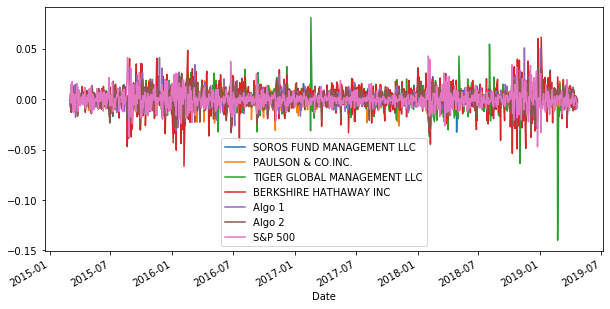

In [80]:
# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(10,5))

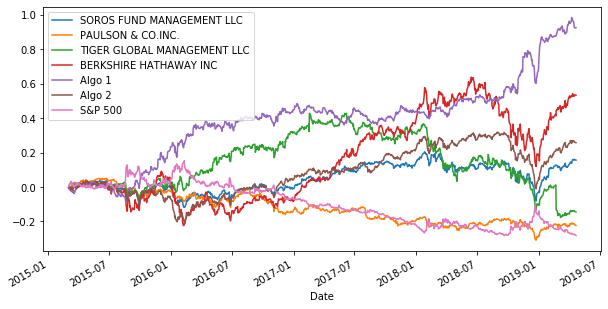

In [89]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns = (1+ combined_df).cumprod()-1
cumulative_returns.head()

# plot the cumulative returns
cumulative_returns.plot(figsize=(10,5))


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

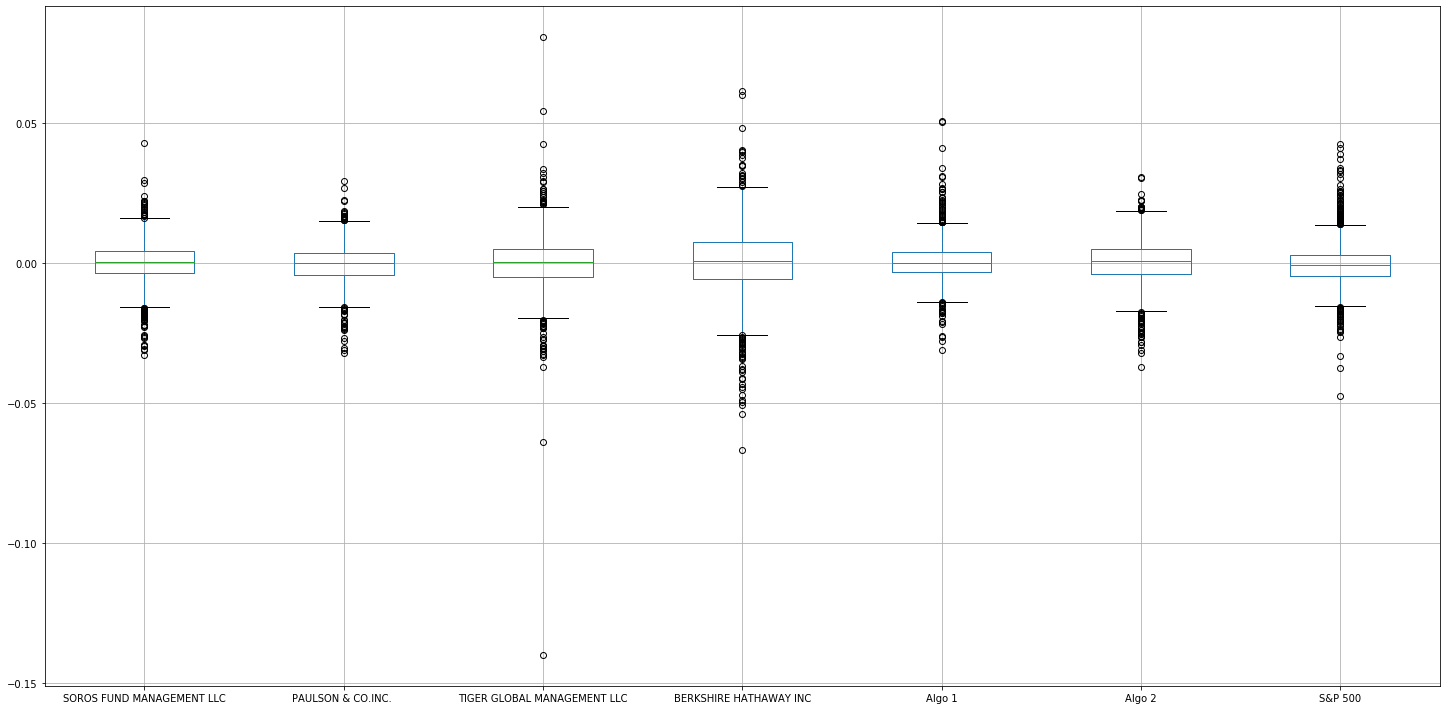

In [94]:
# Box plot to visually show risk
# YOUR CODE HERE

combined_df.boxplot(figsize=(25,12.5))

In [100]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

# calculate standard deviation by using std() function on combined portfolio

daily_standard_deviations = combined_df.std()

# sort values to determine respective risk levels

daily_standard_deviations.sort_values()


PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

As we can see in the above overview of standard deviations of the respective portfolios, the std of S&P500 = 0.008587. If we want to determine what portfolios are riskier than S&P500 we need to look for portfolios with a higher standard deviation. We can conclude that Tiger Global Management (std= 0.010897) and Berkshire Hathaway (std= 0.012919) are riskier than the S&P500



In [109]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

# Annualized Standard Deviation of combined df is squareroot of annualuzed variance of combined df

annualized_standard_deviation = combined_df.std()*np.sqrt(252)
annualized_standard_deviation.sort_values(inplace=True)
annualized_standard_deviation


PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

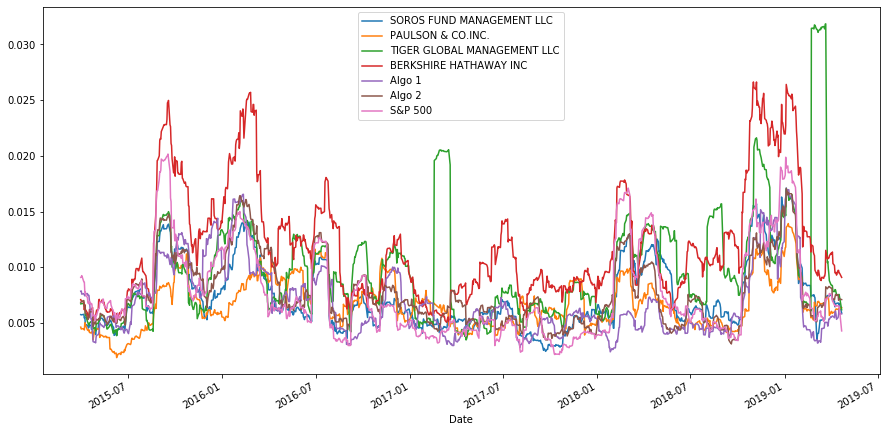

In [126]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_sma21 = combined_df.rolling(window=21).std()
combined_sma21.plot(figsize=(15, 7.5))

# risk increase levels for each of portfolios vis-a-vis risk increase for SP500 is not always the same. This probably has to do with different levels of correleation and BETAs. 

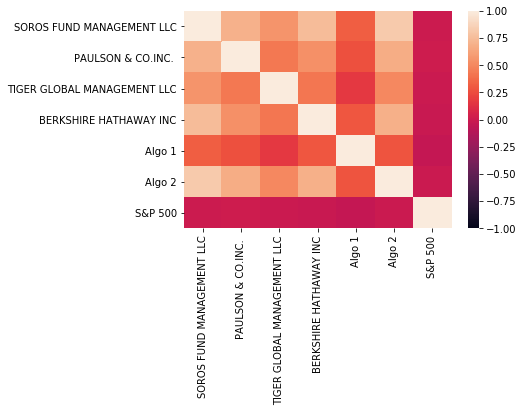

In [137]:
# Correlation
# YOUR CODE HERE
correlation_combined_df = combined_df.corr()
correlation_combined_df

# create correlation table to determine which returns most closely mimic the S&P500
sns.heatmap(correlation_combined_df,vmin=-1, vmax=1)


In [139]:
# Which returns most closely mimic the S&P 500

correlation_combined_df

# read table 

# Most closely correlating SP500 means correlation portofolio and SP500 need to be as close to 1 as possible (1=perfect correlation)

As we can see Paulsen Co Inc most closely mimics SP500

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


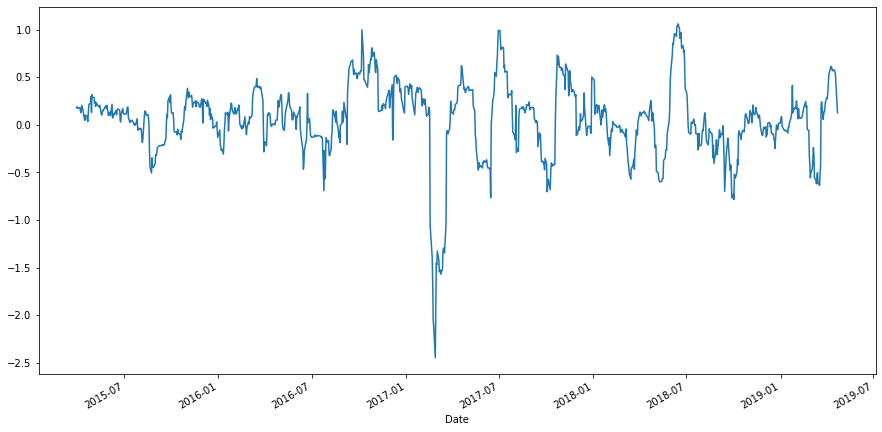

In [146]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

# In order to calculate a rolling Beta we need rolling covariance and rolling variance - I will pick Tiger Global Management LLC in this example for 21 days

## Tiger Global and SP500 covariance 21-day rolling

rolling_tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_df['S&P 500'])

## Rolling 21 day variance of SP500 

rolling_variance_sp500 = combined_df['S&P 500'].rolling(window=21).var()

## 21 day rolling Beta of Tiger Global

rolling_tiger_beta = rolling_tiger_covariance / rolling_variance_sp500
rolling_tiger_beta.plot(figsize=(15, 7.5))


## Does the portfolio seem sensitive to movements in the S&P 500?

As you can see in the above rolling Beta plot the Beta for Tiger fluctuates between 1 and -2.5 which means that movements in the SP500 do impact this portfolio, but in different ways and levels over time. In this time frame we have seen both positive and negative betas referring to strong correlation/volatility (if higher than 1) and inverse correlation where betas are <0.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [ ]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE